# 1. Linear Models with Scikit-learn


The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. 

Across the module, we designate the vector 
θ= (θ1,.... ,θm) as coef_ and 
θ0 as intercept_.

# 1.1 Ordinary Least Squares ==> Linear regression

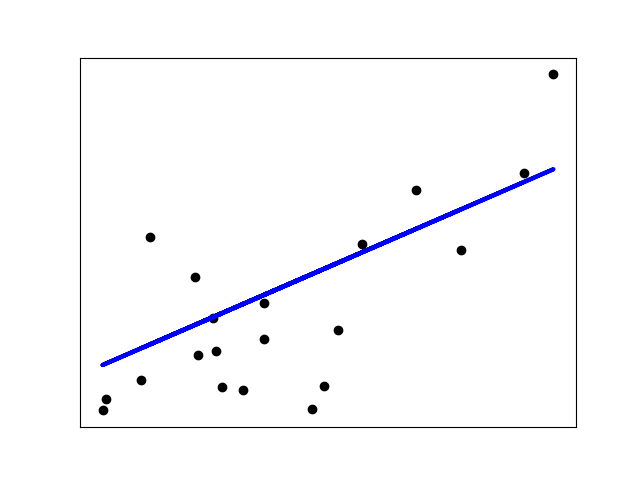

In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
print(reg.coef_)
print(reg.intercept_)

[0.5 0.5]
1.1102230246251565e-16


# 1.1.1 Linear Regression Example


In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [9]:
from sklearn import datasets
import pandas as pd

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target

# Print the header (first few rows) and description of the dataset
print("Header (first few rows):")
print(df.head())

print("\nDescription:")
print(datasets.load_diabetes()['DESCR'])


Header (first few rows):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0  

Description:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a


In [7]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


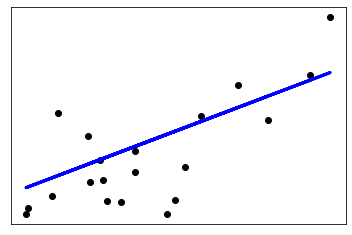

In [8]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# 1.2. Ridge regression

Ridge regression is a technique used in statistics and machine learning to deal with the problem of overfitting, which occurs when a model learns to fit the training data too closely, capturing noise along with the underlying pattern. Ridge regression adds a penalty term to the traditional least squares method, which is used to minimize the error between the predicted values and the actual values in the training data.

In [11]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
print(reg.coef_)
print(reg.intercept_)

[0.34545455 0.34545455]
0.13636363636363638


# 1.3. Lasso
The Lasso is a type of linear model that likes to keep things simple by focusing on fewer important features. It does this by setting some coefficients (or weights) to zero, effectively ignoring less important features. This can be helpful when you have a lot of features and want to find the most relevant ones.


In [13]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
print(reg.predict([[1, 1]]))
print(reg.coef_)
print(reg.intercept_)

[0.6 0. ]
0.2


# 1.4. Multi-task Lasso
Multi-task Lasso is a variant of the Lasso regression algorithm that is used in machine learning for regression tasks. It is designed to handle multiple related regression tasks simultaneously, where the goal is to predict multiple target variables using the same set of input features.

In [25]:
from sklearn import linear_model
clf = linear_model.MultiTaskLasso(alpha=0.1)
clf.fit([[0, 1], [1, 2], [2, 4]], [[0, 0], [1, 1], [2, 3]])
print(clf.coef_)
print(clf.intercept_)

[[0.         0.60809415]
 [0.         0.94592424]]
[-0.41888636 -0.87382323]


In [26]:
import numpy as np
from sklearn.linear_model import MultiTaskLasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some synthetic data
np.random.seed(0)
n_samples, n_features, n_tasks = 100, 30, 5
X = np.random.randn(n_samples, n_features)
W = np.random.randn(n_features, n_tasks)
Y = np.dot(X, W) + np.random.randn(n_samples, n_tasks)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create and fit the Multi-task Lasso model
model = MultiTaskLasso(alpha=0.1)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.5245618368260923


# https://scikit-learn.org/stable/modules/linear_model.html

# A Case Study

In [30]:
import pandas as pd

dfcars = pd.read_csv("mtcars.csv")
dfcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [16]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [17]:
y_train = traindf.mpg

In [18]:
y_train_reshape = y_train.values.reshape(y_train.shape[0], 1)

Text(0, 0.5, 'Car MPG')

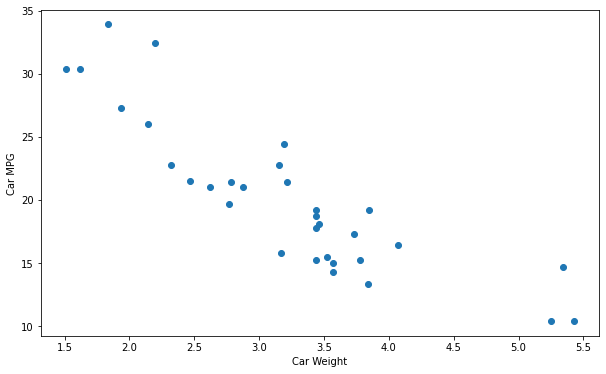

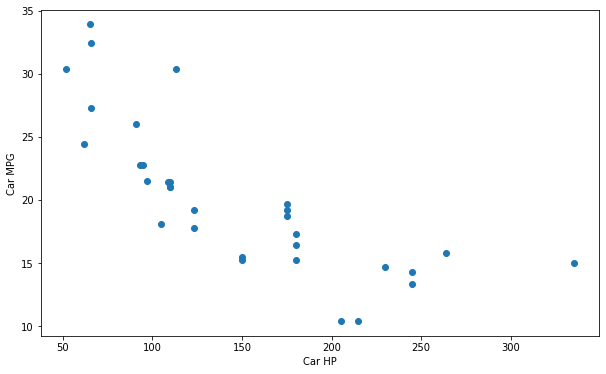

In [19]:
y_mpg = dfcars.mpg
x_wt = dfcars.wt
x_hp = dfcars.hp

fig_wt, ax_wt = plt.subplots(1,1, figsize=(10,6))
ax_wt.scatter(x_wt, y_mpg)
ax_wt.set_xlabel(r'Car Weight')
ax_wt.set_ylabel(r'Car MPG')

fig_hp, ax_hp = plt.subplots(1,1, figsize=(10,6))
ax_hp.scatter(x_hp, y_mpg)
ax_hp.set_xlabel(r'Car HP')
ax_hp.set_ylabel(r'Car MPG')

# We will now use sklearn to predict automobile mileage per gallon (mpg) and evaluate these predictions. 
Exercise (10 min)
Pick one variable to use as a predictor for simple linear regression. Create a markdown cell below and discuss your reasons.
Justify your choice with some visualizations.
Is there a second variable you'd like to use? For example, we're not doing multiple linear regression here, but if we were, is there another variable you'd like to include if we were using two predictors?

Hints:

Use the following to perform the analysis:

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

# Exercise
Use sklearn to fit the training data using simple linear regression.
Use the model to make mpg predictions on the test set.
Plot the data and the prediction.
Print out the mean squared error for the training set and the test set and compare.